In [1]:
import pandas as pd 
import numpy as np

water = pd.read_csv('water_usage copy.csv', index_col='Year', parse_dates=True)
water

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


<AxesSubplot:xlabel='Year'>

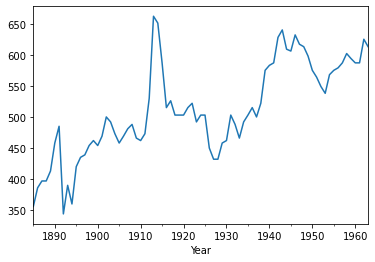

In [2]:
water.Water.plot()

In [3]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')


In [4]:
stepwise_fit = auto_arima(water['Water'], trace = True, start_P=1, start_Q = 1, start_D = 1, max_p=6, max_q=6, max_d = 6, suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=769.592, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=771.525, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=771.507, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=768.378, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=773.450, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.253 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   79
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -383.189
Date:                Tue, 29 Mar 2022   AIC                            768.378
Time:                        18:05:30   BIC                            770.734
Sample:                             0   HQIC                           769.321
                                 - 79                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1082.9997     87.668     12.353      0.000     911.173    1254.826
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):               123.82
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.42
Prob(H) (two-sided):                  0.01   Kurtosis:                         9.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
from statsmodels.tsa.arima_model import ARIMA
X = water.astype('float32')
train = X.head(60)
test = X.tail(19)

In [6]:
model = ARIMA(train.Water, order = (1,0,5))
model = model.fit()
model.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34470D+00    |proj g|=  2.36019D-01

At iterate    5    f=  5.11078D+00    |proj g|=  3.07969D-02

At iterate   10    f=  5.09203D+00    |proj g|=  1.17231D-02


 This problem is unconstrained.



At iterate   15    f=  5.08795D+00    |proj g|=  7.21441D-03

At iterate   20    f=  5.08724D+00    |proj g|=  2.47908D-03

At iterate   25    f=  5.06035D+00    |proj g|=  7.92951D-02
  ys=-4.073E-16  -gs= 3.643E-14 BFGS update SKIPPED

At iterate   30    f=  5.04077D+00    |proj g|=  2.36758D-02

At iterate   35    f=  5.03939D+00    |proj g|=  7.61355D-03

At iterate   40    f=  5.03935D+00    |proj g|=  2.30287D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   45    f=  5.03933D+00    |proj g|=  2.91287D-03

At iterate   50    f=  5.03933D+00    |proj g|=  1.58460D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   55    f=  5.03933D+00    |proj g|=  5.53175D-03

At iterate   60    f=  5.03932D+00    |proj g|=  2.35016D-02
  ys=-2.799E-07  -gs= 1.320E-06 BFGS update SKIPPED

At iterate   65    f=  5.03932D+00    |proj g|=  1.92182D-02

At iterate   70    f=  5.03932D+00    |proj g|=  2.97549D-03

At iterate   75    f=  5.03931D+00    |proj g|=  7.48628D-03

At iterate   80    f=  5.03930D+00    |proj g|=  1.20152D-02

At iterate   85    f=  5.03925D+00    |proj g|=  1.85596D-02

At iterate   90    f=  5.03867D+00    |proj g|=  8.86100D-03

At iterate   95    f=  5.03668D+00    |proj g|=  7.50955D-03

At iterate  100    f=  5.03661D+00    |proj g|=  1.29498D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-3.726E-05  -gs= 2.203E-05 BFGS update SKIPPED

At iterate  105    f=  5.03660D+00    |proj g|=  4.93925D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  110    f=  5.03660D+00    |proj g|=  3.30745D-02
  ys=-1.028E-04  -gs= 1.695E-05 BFGS update SKIPPED

At iterate  115    f=  5.03660D+00    |proj g|=  2.42990D-02
  ys=-2.732E-05  -gs= 1.327E-05 BFGS update SKIPPED
  ys=-2.160E-07  -gs= 1.601E-06 BFGS update SKIPPED

At iterate  120    f=  5.03660D+00    |proj g|=  9.29932D-03

At iterate  125    f=  5.03660D+00    |proj g|=  1.05266D-02
  ys=-7.487E-10  -gs= 4.133E-10 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


  ys=-6.010E-10  -gs= 3.637E-10 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7    129    568      8     8     0   3.201D-02   5.037D+00
  F =   5.0365957391639427     

ABNORMAL_TERMINATION_IN_LNSRCH                              


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Water   No. Observations:                   60
Model:                     ARMA(1, 5)   Log Likelihood                -302.196
Method:                       css-mle   S.D. of innovations             36.819
Date:                Tue, 29 Mar 2022   AIC                            620.391
Time:                        18:05:32   BIC                            637.146
Sample:                    01-01-1885   HQIC                           626.945
                         - 01-01-1944                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         486.2502     16.345     29.749      0.000     454.214     518.286
ar.L1.Water     1.0000      0.018     55.861      0.000       0.965       1.035
ma.L1.Water     0.0009      0.073      0.012      0.991      -0.141       0.143
ma.L2.Water    -0.1386      0.073     -1.886      0.059      -0.283       0.005
ma.L3.Water    -0.4490        nan        nan        nan         nan         nan
ma.L4.Water    -0.1723      0.058     -2.947      0.003      -0.287      -0.058
ma.L5.Water    -0.2409      0.064     -3.788      0.000      -0.366      -0.116
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0000           +0.0000j            1.0000            0.0000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9921           -0.8909j            1.3334           -0.3835
MA.3           -0.9921           +0.8909j            1.3334            0.3835
MA.4            0.1344           -1.5221j            1.5280           -0.2360
MA.5            0.1344           +1.5221j            1.5280            0.2360
-----------------------------------------------------------------------------
"""

In [7]:
start = len(train)
end = len(train) + len(test)-1
pred = model.predict(start=start, end = end)
pred.index=water.index[start:end+1]
print(pred)

Year
1945-01-01    563.526237
1946-01-01    526.665148
1947-01-01    498.642802
1948-01-01    488.216414
1949-01-01    486.250198
1950-01-01    486.250198
1951-01-01    486.250198
1952-01-01    486.250198
1953-01-01    486.250198
1954-01-01    486.250198
1955-01-01    486.250198
1956-01-01    486.250198
1957-01-01    486.250198
1958-01-01    486.250198
1959-01-01    486.250198
1960-01-01    486.250198
1961-01-01    486.250198
1962-01-01    486.250198
1963-01-01    486.250198
dtype: float64


<AxesSubplot:xlabel='Year'>

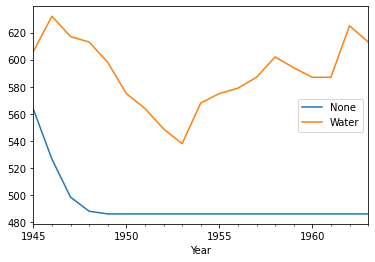

In [8]:
pred.plot(legend=True)
test.Water.plot(legend=True)
#so far its a really bad model. 

In [9]:
test.Water.mean()

589.9473876953125

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred, test.Water))
print(rmse)
#really bad model so far, but the code seems to work lol. 

99.8532306498354


In [11]:
full_model = ARIMA(X.Water, order=(1,0,5))
full_model= full_model.fit()
X.tail()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.56625D+00    |proj g|=  3.04283D-01

At iterate    5    f=  5.15178D+00    |proj g|=  2.55212D-02

At iterate   10    f=  5.13185D+00    |proj g|=  4.32995D-02

At iterate   15    f=  5.12691D+00    |proj g|=  8.30012D-03
  ys=-1.389E-02  -gs= 1.182E-03 BFGS update SKIPPED


 This problem is unconstrained.



At iterate   20    f=  5.12530D+00    |proj g|=  2.84786D-03

At iterate   25    f=  5.12331D+00    |proj g|=  5.84476D-02

At iterate   30    f=  5.00355D+00    |proj g|=  1.52800D-01

At iterate   35    f=  4.98693D+00    |proj g|=  3.91420D-04

At iterate   40    f=  4.98693D+00    |proj g|=  6.66134D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


  ys=-6.761E-12  -gs= 3.490E-12 BFGS update SKIPPED

At iterate   45    f=  4.98693D+00    |proj g|=  6.95799D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45    167      3     2     0   6.958D-04   4.987D+00
  F =   4.9869285312135299     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


,Water
Year,
1959-01-01,594.0
1960-01-01,587.0
1961-01-01,587.0
1962-01-01,625.0
1963-01-01,613.0


In [12]:
#For future dates
#index_future_dates = pd.date_range(start='1963-01-01', end='1980-01-01')
#print(index_future_dates)
pred2 = full_model.predict(start=len(X), end=len(X)+17)
print(pred2)

1964-01-01    592.623182
1965-01-01    552.618769
1966-01-01    551.399010
1967-01-01    508.686858
1968-01-01    510.431212
1969-01-01    510.431241
1970-01-01    510.431269
1971-01-01    510.431298
1972-01-01    510.431327
1973-01-01    510.431355
1974-01-01    510.431384
1975-01-01    510.431412
1976-01-01    510.431441
1977-01-01    510.431469
1978-01-01    510.431498
1979-01-01    510.431526
1980-01-01    510.431555
1981-01-01    510.431584
Freq: AS-JAN, dtype: float64


<AxesSubplot:>

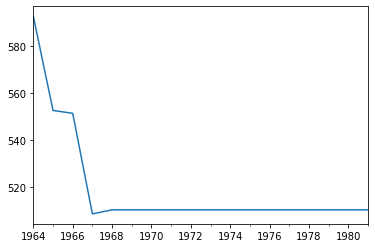

In [13]:
pred2.plot()